Practical 2-2

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data() 



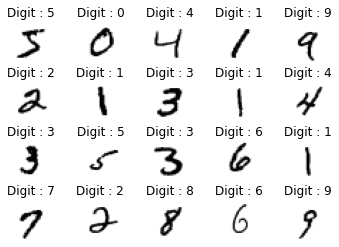

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)
How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  

Text(0.5, 0, 'Intensity')

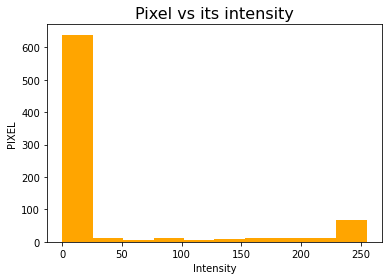

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)
print('How image looks like : ')
print(train_img[0])
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')


How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

Text(0.5, 0, 'Intensity')

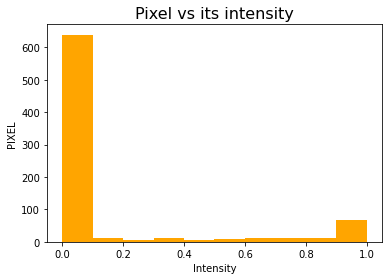

In [ ]:
train_img=train_img/255.0
test_img=test_img/255.0
print('How image looks like after normalising: ')
print(train_img[0])
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1828 - accuracy: 0.9442
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0803 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0540 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0450 - accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0328 - accuracy: 0.9892
313/313 - 1s - loss: 0.1035 - accuracy: 0.9726 - 1s/epoch - 3ms/step
Test Loss 0.10347635298967361
Test Accuracy 0.972599983215332
313/313 [==============================] - 1s 3ms/step
Predicted Value:  7
Successful prediction


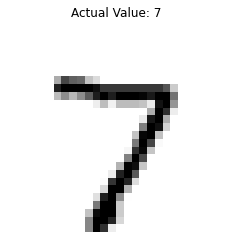

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)
#compiling the sequential model
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_img,train_lab,epochs=5)
#model.save('project.h5')

loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')

print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 1s 3ms/step
Predicted Value:  2
Successful prediction
313/313 [==============================] - 1s 3ms/step
Predicted Value:  1
Successful prediction


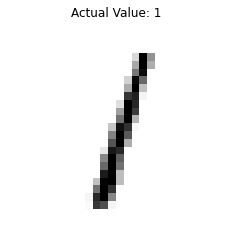

In [ ]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')

print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
    print('Unsuccessful prediction')
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')



Saving 5.jpg to 5 (4).jpg
1/1 [==============================] - 0s 23ms/step
Predicted value :  5


TypeError: ignored

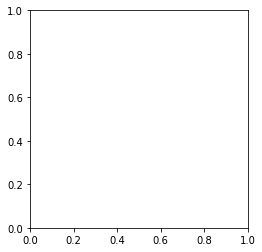

In [ ]:
# make a prediction for a new image.

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
# load and prepare the image
def load_image(filename):
# load the image
  img = load_img(filename, grayscale=True, target_size=(28, 28))
# convert to array
  img = img_to_array(img)
# reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28)
# prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img
from google.colab import files
uploaded = files.upload()
from IPython.display import Image
Image('5.jpg',width=250,height=250)
img = load_image('5.jpg')
digit=model.predict(img)

print('Predicted value : ',np.argmax(digit))
plt.imshow(img,cmap='gray_r')
plt.show()
from google.colab import files
uploaded = files.upload()
from IPython.display import Image
Image('5.jpg')
img = load_image('5.jpg')
digit=model.predict(img)
print(np.argmax(digit))
from google.colab import files
uploaded = files.upload()
model=t.keras.models.load_model('Practical1_DL.h5')

Practical 2-2

Training data shape: (28, 28).
Training data shape: (60000, 28, 28).
Xtrain flattened shape is: (60000, 784)
Epoch 1/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4709 - accuracy: 0.8766
Epoch 2/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3049 - accuracy: 0.9148
Epoch 3/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9232
Epoch 5/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9256
Epoch 6/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9269
Epoch 7/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2587 - accuracy: 0.9276
Epoch 8/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2560 - accuracy: 0.9286
Epoch 9/11
1875/1875 [==============================] - 4s 2ms/step - loss:

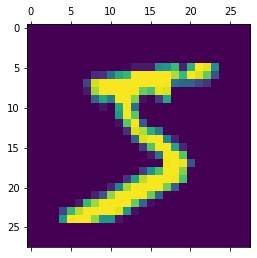

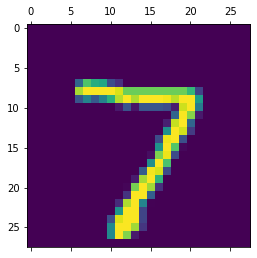

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)
len(X_test)
print(f"Training data shape: {X_train[0].shape}.")
X_train[0]
plt.matshow(X_train[0])
y_train[0]
y_train[:5]
print(f"Training data shape: {X_train.shape}.")
X_train = X_train / 255
X_test = X_test / 255
X_train.reshape(len(X_train),28*28)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(f"Xtrain flattened shape is: {X_train_flattened.shape}")
X_train_flattened[0]
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=11)
model.evaluate(X_test_flattened, y_test)
y_predicted = model.predict(X_test_flattened)
print(f"Predicted value is: {y_predicted[0]}.")
print("====================================")
plt.matshow(X_test[0])
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(f"Confusion matrix: \n{cm}")


In [ ]:
model.summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Text(69.0, 0.5, 'Truth')

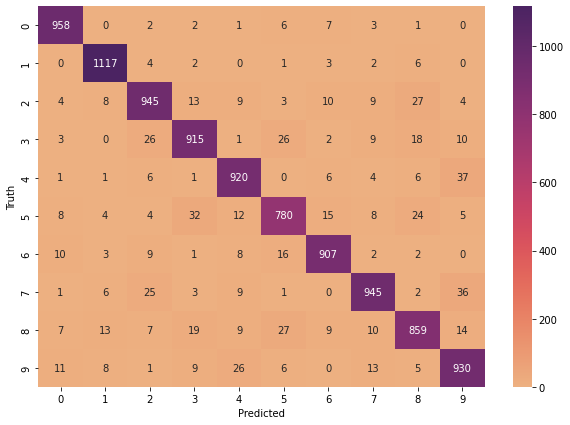

In [ ]:

import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,cmap='flare',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Practical 3

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Importing the data
!kaggle datasets download -d chetankv/dogs-cats-images

 96% 417M/435M [00:05<00:00, 92.7MB/s]
100% 435M/435M [00:05<00:00, 85.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-cats-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/dog vs cat/dataset/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_df = keras.utils.image_dataset_from_directory(
    directory = '/content/dog vs cat/dataset/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
#Normalization
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_df.map(process)
validation_ds = validation_df.map(process)

In [ ]:
#CNN model with hidden layers

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_df,epochs=1,validation_data=validation_df)

250/250 [==============================] - 1652s 7s/step - loss: 0.6639 - accuracy: 0.6284 - val_loss: 1.1102 - val_accuracy: 0.5725


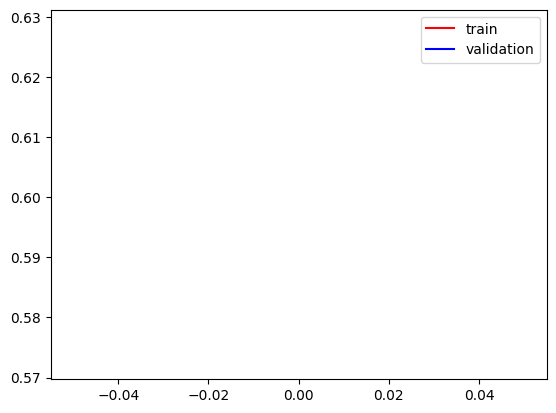

In [ ]:
#Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#not needed 
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(fit_data.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

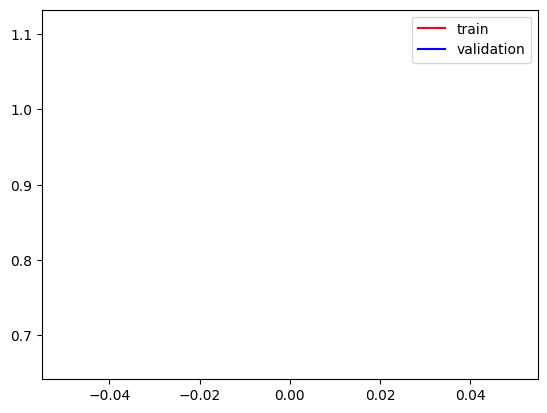

In [ ]:
#Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np
test_cat = cv2.imread('/content/cat1.jpg')

In [ ]:
test_dog=cv2.imread('/content/dog.jpg')

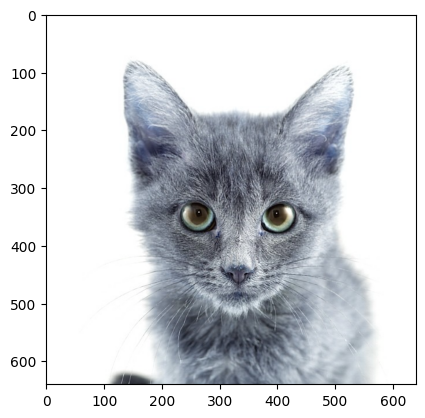

In [ ]:
cat=plt.imshow(np.asarray(test_cat))

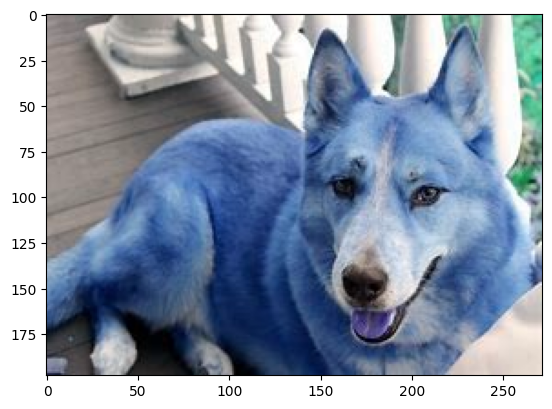

In [ ]:
dog=plt.imshow(test_dog)

In [ ]:
print("Cat img shape: ",test_cat.shape)
print("Dog img shape: ",test_dog.shape)

Cat img shape:  (640, 640, 3)
Dog img shape:  (198, 272, 3)


In [ ]:
test_cat = cv2.resize(test_cat,(256,256))
test_dog = cv2.resize(test_dog,(256,256))

In [ ]:
test_input_cat = test_cat.reshape((1,256,256,3))
test_input_dog = test_dog.reshape((1,256,256,3))

In [ ]:
out=model.predict(test_input_cat)
print(out)

1/1 [==============================] - 0s 267ms/step
[[0.63759637]]


In [ ]:
if out[0]>0.5:
  print("It is a Cat.")

It is a Cat.


In [ ]:
out1=model.predict(test_input_dog)
print(out1)

1/1 [==============================] - 0s 68ms/step
[[0.7867843]]


In [ ]:
if out1[0]>0.5:
  print("It is a Dog.")

It is a Dog.


In [ ]:
if out[0]>0:
  print("It is a Cat.")
elif out[0]==1:
  print("It is a Dog.")
else:
  print("Pass proper images!")


It is a Cat.


Practical 5

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#convert 2D array into 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

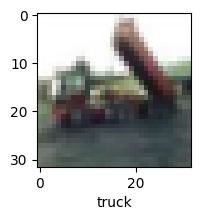

In [ ]:
plot_sample(X_train, y_train, 2)

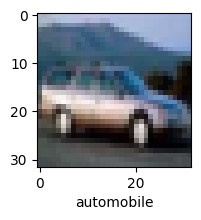

In [ ]:
plot_sample(X_train, y_train, 4)

In [ ]:
#Normalizing the training dataset

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Model building CNN
model = models.Sequential([
layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 78s 48ms/step - loss: 1.4154 - accuracy: 0.4937
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0704 - accuracy: 0.6269
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9366 - accuracy: 0.6746
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8559 - accuracy: 0.7024
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7834 - accuracy: 0.7265
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7311 - accuracy: 0.7442
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6732 - accuracy: 0.7653
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6294 - accuracy: 0.7803
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.5882 - accuracy: 0.7927
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9437 - accuracy: 0.7022


[0.943657636642456, 0.7021999955177307]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[0.10446265, 0.09884505, 0.08837882, 0.10253182, 0.11610553,
        0.09224711, 0.11572967, 0.08888494, 0.09440657, 0.09840774],
       [0.09843041, 0.09650316, 0.08876432, 0.11113466, 0.10966758,
        0.09725334, 0.11738014, 0.08060824, 0.09659225, 0.10366581],
       [0.10027836, 0.09881371, 0.08803306, 0.10701667, 0.10987262,
        0.09712536, 0.10988549, 0.08439147, 0.10349021, 0.10109305],
       [0.10059579, 0.09365515, 0.08907434, 0.10450125, 0.11754823,
        0.09464263, 0.11485022, 0.0893186 , 0.09715585, 0.09865795],
       [0.09842192, 0.09587577, 0.09565077, 0.10366939, 0.10992326,
        0.09575612, 0.11455518, 0.09137075, 0.0940837 , 0.10069318]],
      dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 6, 6, 4, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

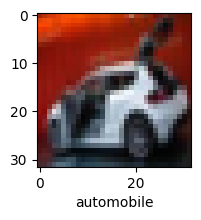

In [ ]:
plot_sample(X_test, y_test,6)

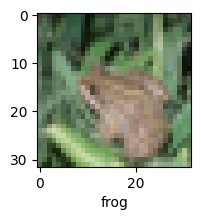

In [ ]:
plot_sample(X_test, y_test,4)

In [ ]:
print(classes[y_classes[4]])
print(classes[y_classes[8]])

frog
deer


Practical 4
https://www.kaggle.com/code/vikassingh1996/malaria-cells-image-classification-feat-tf-2-1

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Importing the data
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 653M/675M [00:05<00:00, 120MB/s]
100% 675M/675M [00:05<00:00, 135MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sb
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


from tensorflow import keras

In [ ]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
orig_path = '/content/cell_images/cell_images'
output_path = '/content/ouput'
splitfolders.ratio(orig_path, output=output_path, seed=1, ratio=(.8, .2))

Copying files: 27560 files [00:05, 5236.57 files/s]


In [ ]:
data_dir = '/content/ouput'
print(data_dir)

/content/ouput


In [ ]:
#Creating train and test path
train = data_dir+'/train/'
test = data_dir+'/val/'

In [ ]:
import os
print('Uninfected image:',os.listdir(train+'Uninfected')[0])
print('Parasitizes image:',os.listdir(train+'Parasitized')[0])

Uninfected image: C216ThinF_IMG_20151106_134733_cell_52.png
Parasitizes image: C136P97ThinF_IMG_20151005_141803_cell_108.png


In [ ]:
uninf_cell = train+'Uninfected/'+'C216ThinF_IMG_20151106_134733_cell_52.png'
para_cell = train+'Parasitized/'+'C136P97ThinF_IMG_20151005_141803_cell_108.png'

In [ ]:
#read image file

cv2.imread(uninf_cell)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
cv2.imread(uninf_cell).shape

(133, 142, 3)

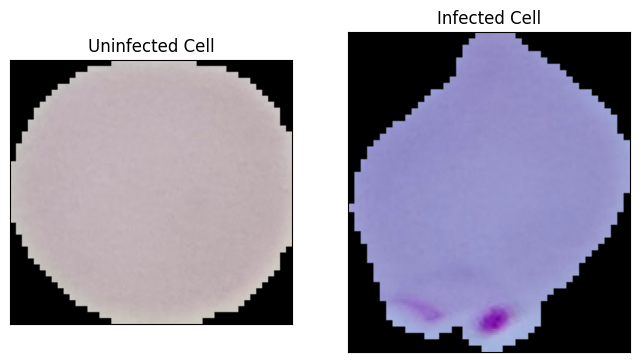

In [ ]:
plt.figure(1, figsize = (8, 8))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(uninf_cell))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(para_cell))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
print('lenght of train parasitized', len(os.listdir(train+'Parasitized')))
print('lenght of train uninfected', len(os.listdir(train+'Uninfected')))
print('lenght of test parasitized', len(os.listdir(test+'Parasitized')))
print('lenght of test uninfected', len(os.listdir(test+'Uninfected')))

lenght of train parasitized 11024
lenght of train uninfected 11024
lenght of test parasitized 2756
lenght of test uninfected 2756


In [ ]:
#Create loop for dimension info

dim1 = []
dim2 = []

for image_filename in os.listdir(train+'Uninfected'):
    try:
        img = cv2.imread(train+'Uninfected/'+image_filename)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)
        
    except AttributeError:
        print('')

<Figure size 1000x1000 with 0 Axes>

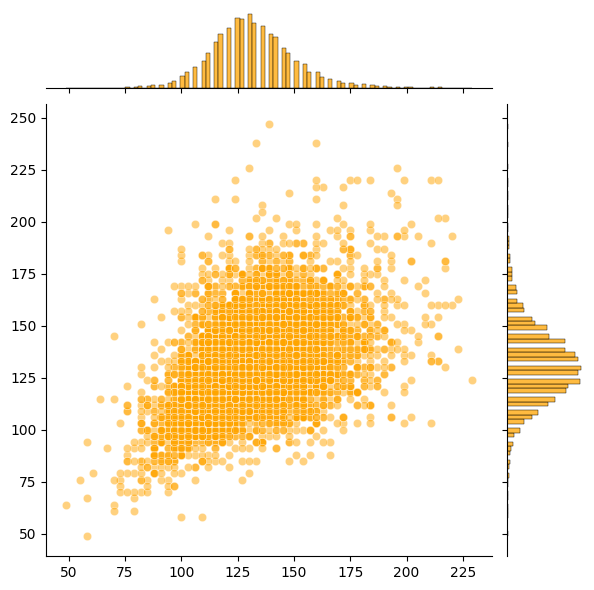

In [ ]:
plt.figure(figsize=(10,10))
sb.jointplot(x=dim1,y=dim2, color='orange',alpha=0.5)
plt.show()

In [ ]:
print("Average dim: ",np.mean(dim1))
print("Average dim: ",np.mean(dim2))

Average dim:  131.64247482536516
Average dim:  131.29220720312074


In [ ]:
image_shape = (130,130, 3)

In [ ]:
train_image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1./255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

test_image_gen = ImageDataGenerator(rescale=1./255)

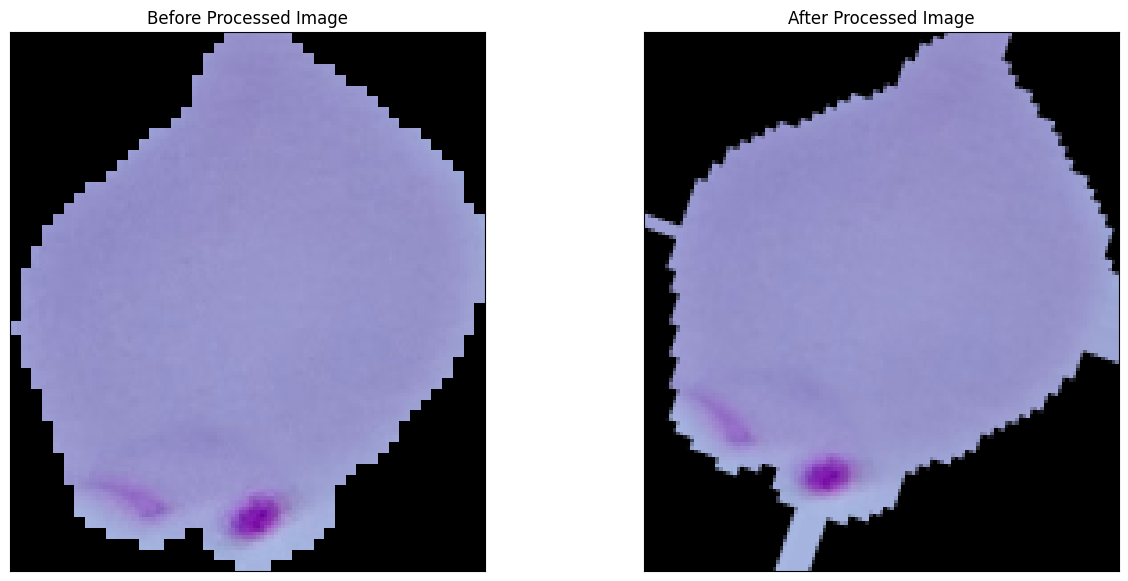

In [ ]:
#showing processed image
para_img = cv2.imread(para_cell)

plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(para_img)
plt.title('Before Processed Image')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(train_image_gen.random_transform(para_img))
plt.title('After Processed Image')
plt.xticks([]) , plt.yticks([])

plt.show()  

In [ ]:
#model building
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

          
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
train_generator = train_image_gen.flow_from_directory(train,target_size=image_shape[:2],color_mode='rgb',batch_size=32,class_mode='binary')

test_generator = test_image_gen.flow_from_directory(test,target_size=image_shape[:2],color_mode='rgb',batch_size=32,class_mode='binary',shuffle=False)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
#Checking the target
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
history = model.fit(train_generator, epochs=5,validation_data = test_generator,callbacks=[early_stop])

Epoch 1/5
689/689 [==============================] - 610s 884ms/step - loss: 0.4147 - accuracy: 0.8059 - val_loss: 0.1673 - val_accuracy: 0.9490
Epoch 2/5
689/689 [==============================] - 575s 834ms/step - loss: 0.1954 - accuracy: 0.9385 - val_loss: 0.1408 - val_accuracy: 0.9568
Epoch 3/5
689/689 [==============================] - 559s 811ms/step - loss: 0.1797 - accuracy: 0.9440 - val_loss: 0.1451 - val_accuracy: 0.9546
Epoch 4/5
689/689 [==============================] - 555s 805ms/step - loss: 0.1764 - accuracy: 0.9445 - val_loss: 0.1358 - val_accuracy: 0.9543
Epoch 5/5
689/689 [==============================] - 567s 823ms/step - loss: 0.1740 - accuracy: 0.9457 - val_loss: 0.1334 - val_accuracy: 0.9566


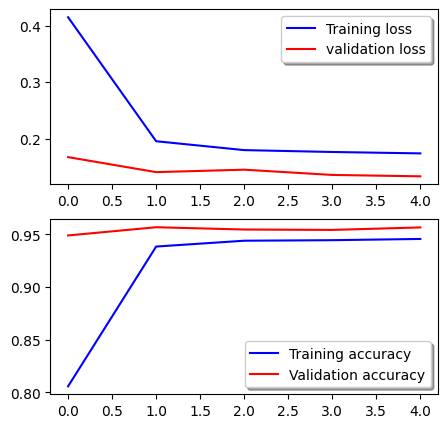

In [ ]:
#Analysis of training & validation
fig, ax = plt.subplots(2,1, figsize = (5,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
out=model.predict(test_generator)
print(out)


173/173 [==============================] - 33s 188ms/step
[[1.3213874e-05]
 [3.4844660e-07]
 [1.8366668e-04]
 ...
 [8.1322277e-01]
 [2.2482001e-03]
 [9.8981392e-01]]


In [ ]:
predict_classes=np.argmax(out,axis=1)
print(predict_classes)

[0 0 0 ... 0 0 0]


In [ ]:
test_gen_values = []
for i in range(len(test_generator)):
    batch = test_generator.next()
    test_gen_values .extend(batch[0])

# Convert the list to a numpy array
#test_gen_values = np.array(test_gen_values )

# Print the shape of the array
#print(test_gen_values.shape)
len(test_gen_values)


5512

In [ ]:
print(test_gen_values[1:6])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

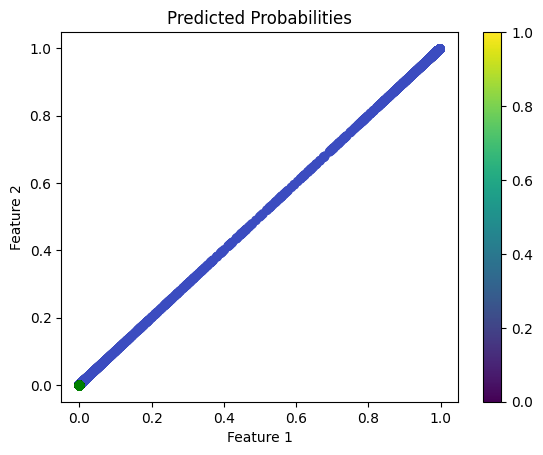

In [ ]:
plt.scatter(out,out, c=predict_classes, cmap='coolwarm')
plt.scatter(predict_classes,predict_classes,color='green')
plt.colorbar()

# Set the axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Probabilities')
plt.show()

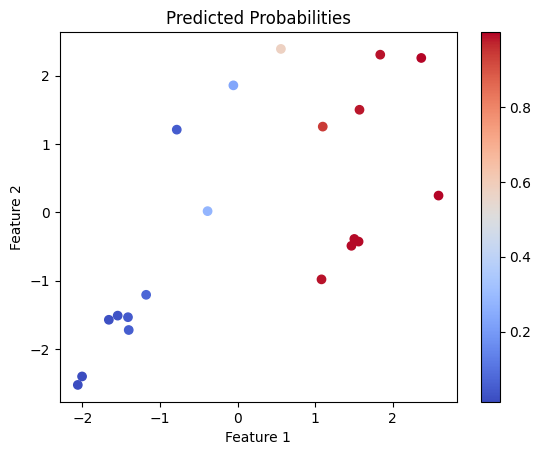

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a random binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training data
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict the class probabilities for the test data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Plot the predicted probabilities as a scatter plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_proba, cmap='coolwarm')
plt.colorbar()

# Set the axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Probabilities')
plt.show()

PRactical 8 done 

Practical 9

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28) / 255.0
x_test = x_test.reshape(-1, 28, 28) / 255.0

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
469/469 [==============================] - 49s 95ms/step - loss: 0.5518 - accuracy: 0.8190 - val_loss: 0.1669 - val_accuracy: 0.9459
Epoch 2/5
469/469 [==============================] - 47s 99ms/step - loss: 0.1445 - accuracy: 0.9560 - val_loss: 0.1085 - val_accuracy: 0.9658
Epoch 3/5
469/469 [==============================] - 45s 97ms/step - loss: 0.0980 - accuracy: 0.9704 - val_loss: 0.0903 - val_accuracy: 0.9724
Epoch 4/5
469/469 [==============================] - 46s 99ms/step - loss: 0.0754 - accuracy: 0.9768 - val_loss: 0.0814 - val_accuracy: 0.9755
Epoch 5/5
469/469 [==============================] - 43s 93ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0659 - val_accuracy: 0.9815


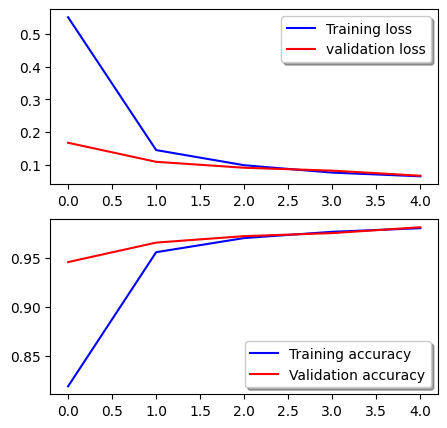

In [ ]:
# Train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

#Analysis of training & validation
fig, ax = plt.subplots(2,1, figsize = (5,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 5s 16ms/step - loss: 0.0659 - accuracy: 0.9815
Test loss: 0.0659
Test accuracy: 0.9815


1/1 [==============================] - 0s 26ms/step


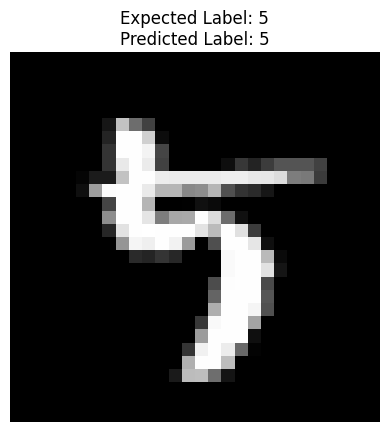

In [ ]:
import numpy as np
(_, _), (x_test, y_test) = mnist.load_data()
# Preprocess the test image
x_test = x_test.reshape(-1, 28, 28) / 255.0
# Select a random test image
index = np.random.randint(0, len(x_test))
test_image = x_test[index]
expected_label = y_test[index]
# Reshape the test image to match the model input shape
test_image = np.expand_dims(test_image, axis=0)
# Make predictions using the trained model
predictions = model.predict(test_image)
predicted_label = np.argmax(predictions)

# Display the test image and predicted label
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Expected Label: {expected_label}\nPredicted Label: {predicted_label}")
plt.axis('off')
plt.show()


practical 6

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding

# Load the "COCO2014Caption" dataset
dataset, info = tfds.load('coco', split='train[:100]', with_info=True, shuffle_files=True)

# Preprocess images and captions
train_images = []
train_captions = []
for example in dataset:
    image = example['image']
    caption = example['caption']

    # Preprocess image
    image = img_to_array(image)
    image = inception_v3.preprocess_input(image)
    train_images.append(image)

    # Preprocess caption
    caption = caption.numpy().decode('utf-8')
    train_captions.append(caption)

# Preprocess captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_captions)
train_captions_tokenized = tokenizer.texts_to_sequences(train_captions)

# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences
max_length = max(len(seq) for seq in train_captions_tokenized)
train_captions_padded = pad_sequences(train_captions_tokenized, maxlen=max_length, padding='post')

# Define the image model
image_model = inception_v3.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_model = Model(new_input, hidden_layer)

# Extract image features
image_features = image_model.predict(train_images)

OSError: ignored

In [ ]:
# Define the caption model
inputs1 = Input(shape=(image_features.shape[1],))
caption_lstm = LSTM(256)(inputs1)
caption_outputs = Dense(vocab_size, activation='softmax')(caption_lstm)
caption_model = Model(inputs=inputs1, outputs=caption_outputs)

# Compile the model
caption_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Train the model
caption_model.fit(image_features, train_captions_padded, epochs=2, verbose=1)



In [ ]:
caption_model.summary()

In [ ]:
# Generate captions for new images
def generate_caption(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(299, 299))
    image = img_to_array(image)
    image = inception_v3.preprocess_input(image.reshape(1, 299, 299, 3))

    # Extract image features
    image_feature = image_model.predict(image)

    # Generate caption
    start_token = tokenizer.word_index['<start>']
    end_token = tokenizer.word_index['<end>']
    caption = []
    for _ in range(max_length):
        sequence = pad_sequences([caption], maxlen=max_length)
        prediction = caption_model.predict([image_feature, sequence], verbose=0)
        prediction = tf.argmax(prediction, axis=-1)
        caption.append(prediction.numpy()[0])
        if prediction.numpy()[0] == end_token:
            break

    # Convert caption from token indices to words
    caption = tokenizer.sequences_to_texts([caption])[0]
    caption = caption.replace(' <start>', '').replace(' <end>', '')

    return caption


In [ ]:
# Generate caption for a sample image
image_path = 'path/to/your/image.jpg'
caption = generate_caption(image_path)
print('Caption:', caption)


practical 7

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing import sequence

max_features = int(input("Set the maximum number of words to be used in the vocabulary:"))
maxlen = int(input("Set the maximum length of input sequences:"))

# Load the IMDB movie review dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure consistent length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model architecture
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))           #LSTM can also be used
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, batch_size=128, epochs=3, validation_data=(x_test, y_test))


Set the maximum number of words to be used in the vocabulary:10000
Set the maximum length of input sequences:500
17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/3
196/196 [==============================] - 303s 2s/step - loss: 0.7058 - accuracy: 0.5158 - val_loss: 0.6831 - val_accuracy: 0.5714
Epoch 2/3
196/196 [==============================] - 338s 2s/step - loss: 0.6808 - accuracy: 0.5541 - val_loss: 0.6661 - val_accuracy: 0.5579
Epoch 3/3
196/196 [==============================] - 334s 2s/step - loss: 0.6761 - accuracy: 0.5639 - val_loss: 0.6718 - val_accuracy: 0.6091


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,313,025
Trainable params: 1,313,025
Non-trainable params: 0
_________________________________________________________________


782/782 [==============================] - 55s 70ms/step - loss: 0.6718 - accuracy: 0.6091
Test Loss: 0.6718408465385437
Test Accuracy: 0.6091200113296509


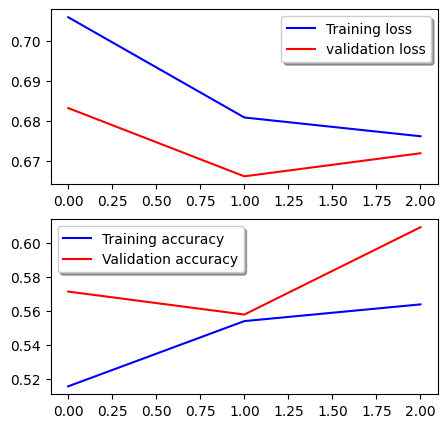

In [ ]:
#Analysis of training & validation
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (5,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
index = int(input("Specify the index of the test data point:"))
test_data = x_test[index]

# Perform sentiment prediction on the test data
predicted_sentiment = model.predict(test_data.reshape(1, -1))[0][0]

print(f"The polarity is {predicted_sentiment}.")
# Print the predicted sentiment
sentiment_label = 'Positive' if predicted_sentiment <= 0.5 else 'Negative'
print("Predicted Sentiment: {}".format(sentiment_label))

Specify the index of the test data point:50
1/1 [==============================] - 0s 37ms/step
The polarity is 0.49633166193962097.
Predicted Sentiment: Positive


prac 9


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing import sequence


In [ ]:
max_words = int(input("Set the maximum number of words to consider:"))

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)


Set the maximum number of words to consider:5000
17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
max_sequence_length = int(input("Set the maximum sequence length:"))

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_sequence_length)


Set the maximum sequence length:500


In [ ]:
# Set the embedding vector dimension
embedding_dim = 32

# Create the LSTM model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history=model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
391/391 [==============================] - 332s 843ms/step - loss: 0.5230 - accuracy: 0.7270 - val_loss: 0.3650 - val_accuracy: 0.8432
Epoch 2/5
391/391 [==============================] - 386s 989ms/step - loss: 0.2986 - accuracy: 0.8798 - val_loss: 0.3661 - val_accuracy: 0.8416
Epoch 3/5
391/391 [==============================] - 325s 833ms/step - loss: 0.2426 - accuracy: 0.9061 - val_loss: 0.2939 - val_accuracy: 0.8812
Epoch 4/5
391/391 [==============================] - 320s 818ms/step - loss: 0.2358 - accuracy: 0.9062 - val_loss: 0.3442 - val_accuracy: 0.8576
Epoch 5/5
391/391 [==============================] - 326s 835ms/step - loss: 0.1963 - accuracy: 0.9244 - val_loss: 0.3168 - val_accuracy: 0.8716


782/782 [==============================] - 71s 90ms/step - loss: 0.3168 - accuracy: 0.8716
Test Loss: 0.31675881147384644
Test Accuracy: 0.8716400265693665
782/782 [==============================] - 68s 87ms/step - loss: 0.3168 - accuracy: 0.8716
Test loss: 0.31675881147384644
Test accuracy: 0.8716400265693665


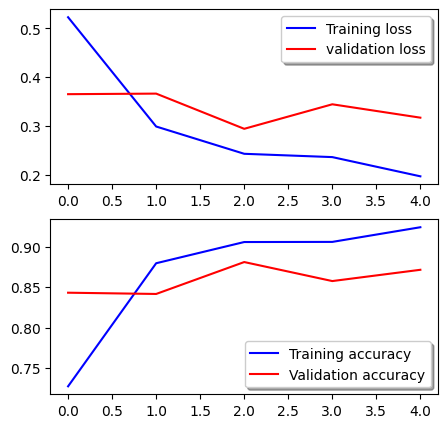

In [ ]:
#Analysis of training & validation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize = (5,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [ ]:
index = int(input("Specify the index of the test data point:"))
test_data = x_test[index]

# Perform sentiment prediction on the test data
predicted_sentiment = model.predict(test_data.reshape(1, -1))[0][0]

print(f"The polarity is {predicted_sentiment}.")
# Print the predicted sentiment
sentiment_label = 'Positive' if predicted_sentiment <= 0.5 else 'Negative'
print("Predicted Sentiment: {}".format(sentiment_label))

Specify the index of the test data point:22
1/1 [==============================] - 0s 60ms/step
The polarity is 0.1890193670988083.
Predicted Sentiment: Positive


In [ ]:
index = int(input("Specify the index of the test data point:"))
test_data = x_test[index]
test_data

Specify the index of the test data point:5


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

Prac 7

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
import numpy as np

# Load the "flowers" dataset
dataset, info = tfds.load('tf_flowers', split='train', with_info=True, shuffle_files=True)

# Define the number of samples to use
num_samples = 500

# Preprocess images and captions
train_images = []
train_captions = []
for example in tfds.as_numpy(dataset.take(num_samples)):
    image = example['image']
    caption = example['label']

    # Preprocess image
    image = img_to_array(image)
    image = inception_v3.preprocess_input(image)
    train_images.append(image)

    # Preprocess caption
    train_captions.append(caption)

# Preprocess captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(str(train_captions)))
train_captions_tokenized = tokenizer.texts_to_sequences(list(str(train_captions)))

# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences
max_length = max(len(seq) for seq in train_captions_tokenized)
train_captions_padded = pad_sequences(train_captions_tokenized, maxlen=max_length, padding='post')

# Define the image model
image_model = inception_v3.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_model = Model(new_input, hidden_layer)

flattened_list = [element for sublist in train_images for element in sublist]
#len(flattened_list)

# Extract image features
#image_features = image_model.predict(tf.ragged.constant(flattened_list))
image_features = image_model.predict(tf.ragged.constant(flattened_list))

KeyboardInterrupt: ignored